**Question 1:** Do people like long animes or short animes?

During EDA, we used Episode and Score features to try to find the relationship. But we found that there is no strong correlation between the 2 features

hence we try to expand the scope by considering other fea
tures too

Algorithm 1: **linear regression**
The goal is to understand the relationship between the features (e.g., number of episodes, duration, type of anime) and the target variable (anime score). This can help identify whether certain characteristics of an anime (e.g., longer series) are associated with higher or lower viewer scores.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DIC-Anime-Recommendation/Dataset-2/anime-dataset-2023-preprocessed.csv')
df = df.drop(df[df['Score'] == 'UNKNOWN'].index)
df['Score'] = df['Score'].astype(float)

In [ ]:
#preprocess
df_lr = df.copy()

df_lr['Episodes'] = pd.to_numeric(df_lr['Episodes'], errors='coerce')

df_lr['Duration'] = df_lr['Duration'].str.extract('(\d+)').astype(float)

type_dummies = pd.get_dummies(df_lr['Type'], prefix='Type')

features = pd.concat([
    df_lr[['Episodes', 'Duration']],
    type_dummies
], axis=1)

In [ ]:
X = features
y = df['Score'].fillna(df['Score'].mean())

X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


I used X as the feature matrix to train and evaluate a linear regression model for predicting y, the target variable. I first handled missing values in X by filling them with column means and standardized X to improve model performance. I then split X into training and test sets, trained the linear regression model on X_train and y_train, and used the model to make predictions on X_test.

To evaluate the model, I used metrics such as R-squared and RMSE,

Text(0.5, 1.0, 'Actual vs Predicted Scores')

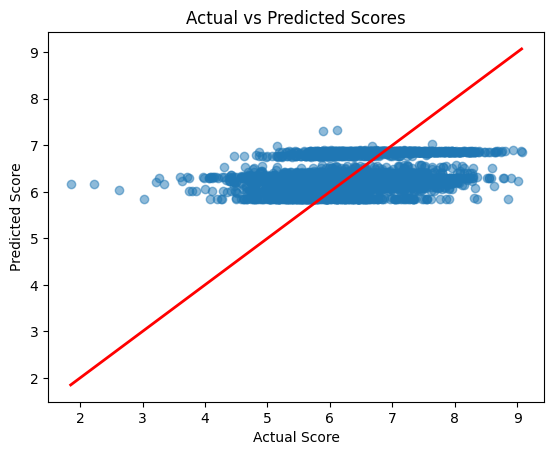

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Scores')


The plot indicates that the model's predictions are concentrated within a narrow range, suggesting potential high bias. This limited spread of predicted scores, along with the deviations from the red perfect prediction line, implies that the model fails to capture the full variability

Text(0.5, 1.0, 'Feature Importance')

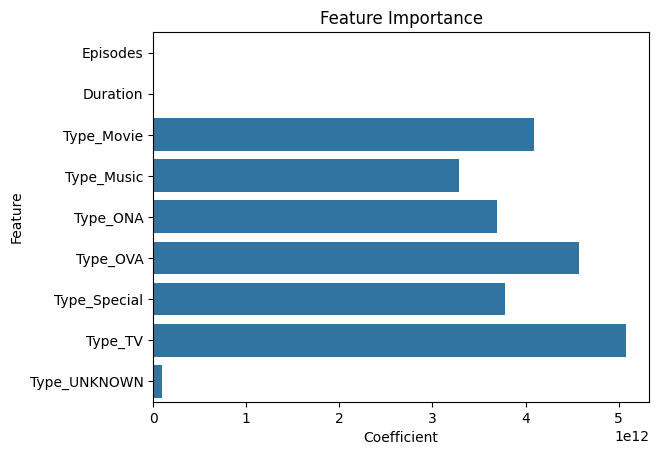

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance')

The large coefficients for the categorical types (e.g., Type_TV, Type_OVA) hint at potential issues (could'nt figure out the reason). This distorts the importance of these features and make the model less reliable for drawing meaningful predictions.

In [ ]:
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print("\nFeature Coefficients:")
for feat, coef in zip(X.columns, lr_model.coef_):
    print(f"{feat}: {coef:.4f}")

R² Score: 0.1160
RMSE: 0.8669

Feature Coefficients:
Episodes: 0.0107
Duration: 0.0613
Type_Movie: 4094535648923.1357
Type_Music: 3286267733227.0156
Type_ONA: 3688699516173.0967
Type_OVA: 4569350194855.7773
Type_Special: 3777228588116.5908
Type_TV: 5074454261989.7344
Type_UNKNOWN: 89675936587.8095


The model shows poor performance with a low R² score. The extremely large coefficients for categorical features suggest scaling issues in the dataset, making the model unreliable for prediction.

To solve our problem, we try gradient boosting regression

Algorithm 2: **Gradient Boosting Regressor**


source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

We agian aim to predict anime scores, but use different features like Episodes, Duration, Members, and Favorites to understand whether people prefer long or short animes. By iteratvi
ely training decision trees, it captures complex patterns in the data.

Gradient Boosting Regressor Can capture non-linear relationships between length and ratings
It Handles complex patterns and interactions in the data
and Can also provide feature importance metrics

In [1]:
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DIC-Anime-Recommendation/Dataset-2/anime-dataset-2023-preprocessed.csv')

df = df.drop(df[df['Score'] == 'UNKNOWN'].index)
df['Score'] = df['Score'].astype(float)

In [4]:
df_gb = df.copy()

#preprocess
df_gb['Episodes'] = pd.to_numeric(df_gb['Episodes'], errors='coerce')
df_gb['Duration'] = df_gb['Duration'].str.extract('(\d+)').astype(float)
df_gb['Members'] = pd.to_numeric(df_gb['Members'], errors='coerce')
df_gb['Favorites'] = pd.to_numeric(df_gb['Favorites'], errors='coerce')

features = df_gb[['Episodes', 'Duration', 'Members', 'Favorites']]

In [5]:
X = features
y = df['Score'].fillna(df['Score'].mean())

X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))




I used X, the feature matrix containing 'Episodes', 'Duration', 'Members', and 'Favorites', to train a gradient boosting regression model for predicting y, which represented the 'Score' column. I first preprocessed X by converting the relevant columns to numeric types and extracting numerical values from strings where necessary. I then handled missing values in X by filling them with column means and standardized the data using StandardScaler to improve the model's performance.

After standardizing X, I split the data into training and test sets and trained a GradientBoostingRegressor model on X_train and y_train. Once trained, I used the model to make predictions on X_test and evaluated its performance using R-squared and RMSE

Text(0.5, 1.0, 'Feature Importance')

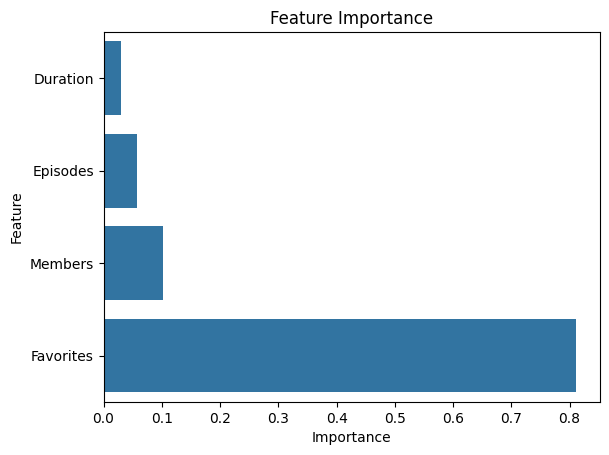

In [6]:
feature_importance = pd.DataFrame({
'Feature': X.columns,
'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=True)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')

The feature importance graph reveals that the "Favorites" feature is the most influential in predicting the score, followed by "Members."
It is indeed as expected since the more people add the anime to favorite, the higher is its score

Text(0.5, 1.0, 'Actual vs Predicted Scores')

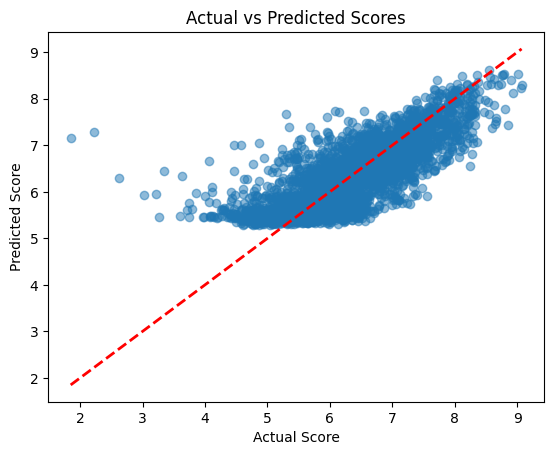

In [7]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Scores')

The scatter plot reveals a positive correlation between actual and predicted scores, with most points clustering near the red dashed diagonal line, which indicates perfect predictions. This suggests that the model generally provides reasonable predictions. However, there is more spread in predictions around the middle range scores (5-7), with a slight overprediction for lower actual scores and underprediction for higher scores.

The model performs better for middle-range values, where predictions are more consistent. For the extreme ends (low and high scores), there’s increased variability, indicating more uncertainty in predictions. Overall, the spread of points suggests moderate prediction error, as perfect accuracy would align all points along the red line.

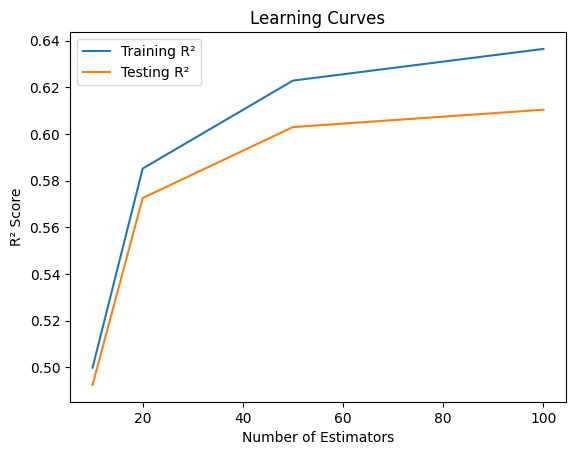

In [8]:
train_scores = []
test_scores = []
n_estimators = [10, 20, 50, 100]

for n in n_estimators:
    model = GradientBoostingRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.plot(n_estimators, train_scores, label='Training R²')
plt.plot(n_estimators, test_scores, label='Testing R²')
plt.xlabel('Number of Estimators')
plt.ylabel('R² Score')
plt.title('Learning Curves')
plt.legend()


We try varying numbers of estimators (10, 20, 50, and 100) to evaluate the performance. Each model was trained on the training data, and R² scores were calculated for both the training and testing datasets. These scores were then plotted to visualize performance changes with the number of estimators.

Though we have used n_estimators = 100 for our original model, we come to know that we would have achieved similar performance for around 80 estimators since we overfit data

The learning curves show that performance improves as the number of estimators increases, with both training (blue) and testing (orange) R² scores following similar patterns. The most significant improvement occurs between 10 and 20 estimators, after which the gains become more gradual. The small gap between training and testing scores (around 0.02) indicates minimal overfitting

In [9]:
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print("\nFeature Importance:")
for feat, imp in zip(X.columns, gb_model.feature_importances_):
    print(f"{feat}: {imp:.4f}")

R² Score: 0.6104
RMSE: 0.5755

Feature Importance:
Episodes: 0.0572
Duration: 0.0302
Members: 0.1017
Favorites: 0.8108


The R^2 and RMSE values are better than linear regression, since we better capture the underlying relationship between features

**Question 2:** which Genres are the most popular??

Algorithm 1: **KMeans Clustering**: the aim is to identify which genre combinations tend to perform better

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DIC-Anime-Recommendation/Dataset-2/anime-dataset-2023.csv')

df = df.drop(df[df['Score'] == 'UNKNOWN'].index)
df['Score'] = df['Score'].astype(float)

df.reset_index(drop=True, inplace=True)

In [4]:
df_km = df.copy()

#preprocess
if df_km['Genres'].dtype == 'object':
    df_km['Genres'] = df_km['Genres'].str.split(',')

mlb = MultiLabelBinarizer()
genre_matrix = pd.DataFrame(
    mlb.fit_transform(df_km['Genres']),
    columns=mlb.classes_
)

df_km['Score'] = pd.to_numeric(df_km['Score'], errors='coerce')
df_km['Members'] = pd.to_numeric(df_km['Members'], errors='coerce')
df_km['Favorites'] = pd.to_numeric(df_km['Favorites'], errors='coerce')

features = pd.concat([
    genre_matrix,
    df_km[['Score', 'Members', 'Favorites']]
], axis=1)


In [5]:
X, genre_names = features, mlb.classes_

X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

optimal_k = k_range[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

I used X, which included a one-hot-encoded genre matrix along with numerical features like 'Score', 'Members', and 'Favorites', to perform clustering analysis with the KMeans algorithm. First, I preprocessed the data by converting the 'Genres' column to lists and binarizing them using MultiLabelBinarizer, creating a genre feature matrix. I also converted 'Score', 'Members', and 'Favorites' to numeric types to ensure consistency. The combined features were prepared by concatenating the genre matrix and the numeric columns, and missing values were filled with column means.

I scaled X with StandardScaler to ensure all features were on the same scale before fitting the KMeans model. I then iteratively trained KMeans with cluster counts ranging from 2 to 10, calculating the silhouette scores and inertias for each to find the optimal number of clusters. The best number of clusters was determined using the maximum silhouette score, and I applied KMeans with this optimal k to assign cluster labels to X_scaled

Text(0.5, 1.0, 'Silhouette Score vs k')

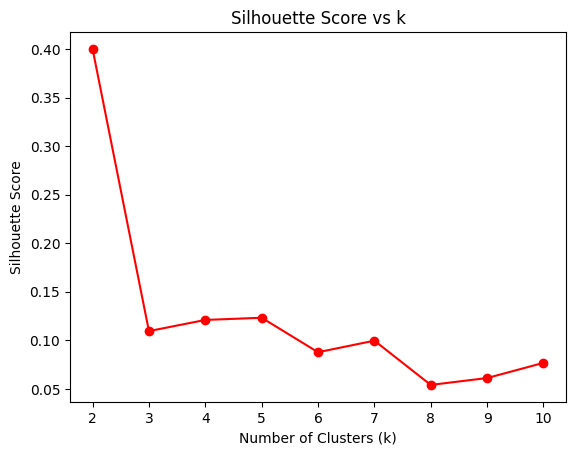

In [6]:
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')

We used the Silhouette score to evaluate different numbers of clusters (k) in a K-means clustering analysis, where the score indicates how well-defined the clusters are. The graph shows that k=2 yields the highest Silhouette score (around 0.4), suggesting that two clusters best represent the data. There is a sharp drop in the score when moving from k=2 to k=3, and scores remain low (below 0.15) for larger values of k. This pattern indicates that the data naturally forms two distinct groups, and increasing the number of clusters results in less distinct boundaries. Therefore, we conclude that k=2 is the optimal choice for clustering this dataset.

In [7]:
genre_cluster_dist = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=X.columns
)

# Print results
print(f"Optimal number of clusters: {optimal_k}")
print(f"Silhouette score: {max(silhouette_scores):.4f}")
print("\nCluster Summary:")
print("\nTop Genres in Each Cluster:")
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    top_genres = genre_cluster_dist.iloc[i][genre_names].nlargest(5)
    print(top_genres)

Optimal number of clusters: 2
Silhouette score: 0.4001

Cluster Summary:

Top Genres in Each Cluster:

Cluster 0:
Mystery          1.000000
 Supernatural    0.262774
 Sci-Fi          0.197080
 Suspense        0.167883
 Romance         0.080292
Name: 0, dtype: float64

Cluster 1:
Action      0.254388
Comedy      0.219479
 Fantasy    0.165863
 Sci-Fi     0.139376
UNKNOWN     0.112697
Name: 1, dtype: float64



Cluster 0 is characterized by animes focused on mystery and supernatural themes, with a strong emphasis on complex plots and eerie, otherworldly elements. These animes often involve solving mysteries or dealing with paranormal occurrences, making them ideal for viewers who enjoy suspense and intellectual stimulation. The presence of sci-fi and suspense further adds to the intrigue, while the romance genre provides occasional character depth.

In contrast, Cluster 1 is dominated by action and comedy, with animes that are high-energy, fast-paced, and designed for entertainment. These animes feature intense fight scenes and humorous moments, appealing to viewers who enjoy thrilling adventures and light-hearted fun. The addition of fantasy and sci-fi elements adds an imaginative layer, making these animes more dynamic and engaging with epic battles and fantastical worlds.

Thus the clusters clearly depicts what combiantion of genres an anime should have for high popularity

Algorithm 2:**Sentiment Analysis using Natural Language Processing**

source: https://www.nltk.org/api/nltk.sentiment.SentimentIntensityAnalyzer.html?highlight=sentimentintensity

For our EDA and the K-Means, we used the genres already given in the dataset. However, an anime may have other directions as well based on its storyline. Here we plan to use NLP to extract the sentiment of the synopsis of an anime, which is the description of the entire storyline of the anime

specifically:
Will analyze the Synopsis text for each genre

Can reveal which genres have more positive descriptions

In [44]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from collections import defaultdict

In [45]:
df = pd.read_csv('/content/drive/MyDrive/DIC-Anime-Recommendation/Dataset-2/anime-dataset-2023.csv')

df = df.drop(df[df['Score'] == 'UNKNOWN'].index)
df['Score'] = df['Score'].astype(float)

df.reset_index(drop=True, inplace=True)

In [48]:
df_nlp = df.copy()

if df_nlp['Genres'].dtype == 'object':
    df_nlp['Genres'] = df_nlp['Genres'].str.split(', ')

df_nlp['sentiment_score'] = df_nlp['Synopsis'].fillna('').apply(
    lambda x: SentimentIntensityAnalyzer().polarity_scores(x)['compound']
)

In [50]:
genre_sentiment = defaultdict(list)
genre_scores = defaultdict(list)

for idx, row in df_nlp.iterrows():
    for genre in row['Genres']:
        genre_sentiment[genre].append(row['sentiment_score'])
        genre_scores[genre].append(row['Score'])

genre_analysis = pd.DataFrame({
    'Genre': list(genre_sentiment.keys()),
    'Avg_Sentiment': [np.mean(scores) for scores in genre_sentiment.values()],
    'Avg_Score': [np.mean(scores) for scores in genre_scores.values()]
})

I used df_nlp, a copy of the original DataFrame, to analyze the relationship between anime genres and sentiment scores derived from their synopses. First, I ensured that the 'Genres' column was properly formatted by splitting its string values into lists. To evaluate the sentiment of the synopses, I computed a sentiment score for each using the SentimentIntensityAnalyzer from the vaderSentiment library. Specifically, I applied a lambda function that passed each synopsis to SentimentIntensityAnalyzer().polarity_scores(x)['compound']. This compound score represents the overall sentiment polarity, where a value closer to 1 indicates positive sentiment, values near -1 indicate negative sentiment, and values around 0 suggest neutrality. These scores were stored in a new column called 'sentiment_score'.

To analyze sentiment and scores by genre, I iterated through each row of the DataFrame, collecting sentiment scores and 'Score' values into dictionaries categorized by genre. This allowed for aggregation of sentiment and user-rated scores specific to each genre. Finally, I constructed a genre_analysis DataFrame that summarized the average sentiment and average score for each genre. This analysis revealed patterns between the sentiment conveyed in synopses and user ratings across different anime genres.

Text(0, 0.5, 'Average Score')

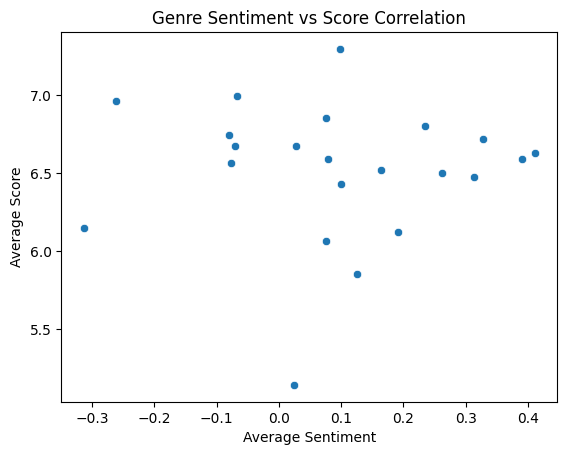

In [53]:
sns.scatterplot(
    data=genre_analysis,
    x='Avg_Sentiment',
    y='Avg_Score'
)
plt.title('Genre Sentiment vs Score Correlation')
plt.xlabel('Average Sentiment')
plt.ylabel('Average Score')

We analyzed the relationship between average sentiment scores of anime synopses and average viewer ratings across genres. Sentiment scores range from approximately -0.3 to 0.4, indicating that synopses vary from moderately negative to moderately positive, while viewer ratings range from 5.2 to 7.2, reflecting generally positive feedback. Most genres cluster between sentiment scores of -0.1 to 0.3 and ratings of 6.0 to 7.0.

Our analysis reveals no strong linear correlation between sentiment and viewer ratings. Interestingly, some genres with negative sentiment scores (around -0.2 to -0.3) still have relatively high ratings (6.8-7.0). This suggests that darker or more negative plot synopses do not necessarily lead to lower viewer enjoyment and may even indicate content that is appreciated for its complexity or maturity.